# Plots

In [138]:
import numpy as np
import pandas as pd 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import torch
import warnings
warnings.filterwarnings("ignore")

In [139]:
checkdir = 'finalcheckpoints/checkpoints_cifar/'
full = checkdir + 'resnet18_optcompams_methodfull_lr0.0001_epoch100.txt'
sign = checkdir + 'resnet18_optcompams_methodsign_lr3e-05_epoch100.txt'
topk = checkdir + 'resnet18_optcompams_methodtopk_lr0.0001_epoch100.txt'
dsgd = checkdir + 'resnet18_optqadam_methodfull_lr0.01_epoch100.txt'
qadam = checkdir + 'resnet18_optqadam_methodQAdam_lr0.01_epoch100.txt'

runfull = pd.read_table(full, index_col = 0, sep = '\t')
runsign = pd.read_table(sign, index_col = 0, sep = '\t')
runtopk = pd.read_table(topk, index_col = 0, sep = '\t')
rundsgd = pd.read_table(dsgd, index_col = 0, sep = '\t')
runqadam = pd.read_table(qadam, index_col = 0, sep = '\t')

In [140]:
runfull.shape,runsign.shape,runtopk.shape,rundsgd.shape,runqadam.shape

((100, 5), (100, 5), (100, 5), (100, 5), (79, 5))

In [144]:
print("full: " + str(runfull['Acc. at 1'].iloc[maxi-1]))
print("sign: " + str(runsign['Acc. at 1'].iloc[maxi-1]))
print("topk: " + str(runtopk['Acc. at 1'].iloc[maxi-1]))
print("qadam: " + str(runqadam['Acc. at 1'].iloc[maxi-1]))
print("dsgd: " + str(rundsgd['Acc. at 1'].iloc[maxi-1]))

full: 92.459999
sign: 90.189995
topk: 91.50999499999999
qadam: 90.720001
dsgd: 90.549995


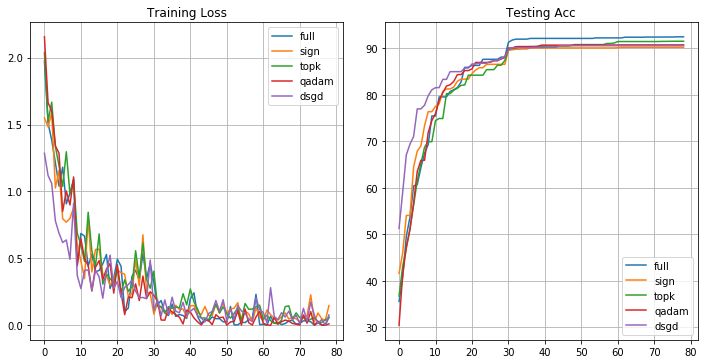

In [143]:
maxi = len(runqadam['Loss'])
xaxis = range(maxi)
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, runfull['Loss'].iloc[0:maxi], label='full')
plt.plot(xaxis, runsign['Loss'].iloc[0:maxi], label='sign')
plt.plot(xaxis, runtopk['Loss'].iloc[0:maxi], label='topk')
plt.plot(xaxis, runqadam['Loss'].iloc[0:maxi], label='qadam')
plt.plot(xaxis, rundsgd['Loss'].iloc[0:maxi], label='dsgd')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, runfull['Acc. at 1'].iloc[0:maxi], label='full')
plt.plot(xaxis, runsign['Acc. at 1'].iloc[0:maxi], label='sign')
plt.plot(xaxis, runtopk['Acc. at 1'].iloc[0:maxi], label='topk')
plt.plot(xaxis, runqadam['Acc. at 1'].iloc[0:maxi], label='qadam')
plt.plot(xaxis, rundsgd['Acc. at 1'].iloc[0:maxi], label='dsgd')
plt.title('Testing Acc')
plt.grid(True)
plt.legend()